In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dsc_thermo import heat_flow as hf
from dsc_thermo import thermo
from dsc_thermo.molar_mass import molar_mass

## heat_flow.py

The output of the dsc is stored in hf.Heat_Flow_Data objects. To initialize one, simply enter the names of the dsc output files for the sample, sapphire, and empty measurements.

In [2]:
sample_file = "ss_vit105xtal_062322-3.txt"
sapphire_file = "ss_sapphire_062322-2.txt"
empty_file = "ss_empty_062322-1.txt"

vit105_crystal_data = hf.Heat_Flow_Data(sample_file, sapphire_file, empty_file)

To get the Specific heat, call the cp() method

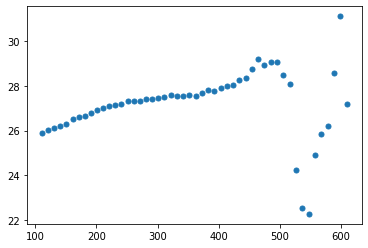

In [3]:
mu_vit105 = molar_mass("Zr52.5Cu17.9Ni14.6Al10Ti5") #molar mass of vit105
T_measured, Cp_measured = vit105_crystal_data.cp(mu_vit105)

plt.plot(T_measured, Cp_measured, ".", ms=10)

## thermo.py

thermo.py calculates a material's thermodynamic properties from it Cp data. Most of this work is done in the thermo.Phase object. The first argument is a hf.Heat_Flow_Data object, or a list of hf.Heat_Flow_Data objects if you have more than one measurement. 

The thermo.Phase object will fit the Cp data to a specified function (the function is assumed to measure $T$ in $K$), then calculates $S, H$, and $G$ as functions of $T$ (again in $K$). 

In [4]:
vit105_crystal_phase = thermo.Phase(vit105_crystal_data, Cp_fit_func=thermo.cp_crystal, molar_mass=mu_vit105, Tf=1085)

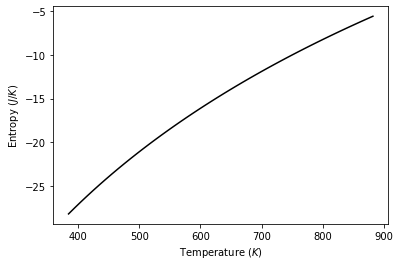

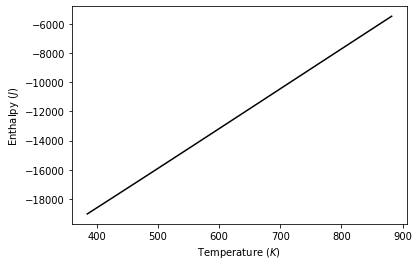

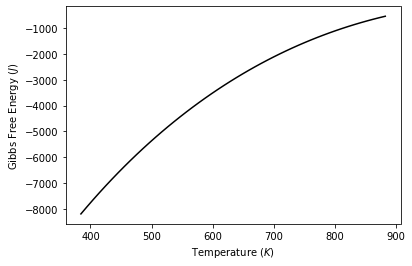

In [5]:
T = np.linspace(min(T_measured)+273.15, max(T_measured)+273.15)

#Calculated S, H and G for vit105 crystal
#Note that these are only up to a constant, since we didn't specify the enthalpy of formation
plt.plot(T, vit105_crystal_phase.entropy(T), "k", label="fit")
plt.xlabel("Temperature ($K$)")
plt.ylabel("Entropy ($J/K$)")
plt.show()


plt.plot(T, vit105_crystal_phase.enthalpy(T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Enthalpy ($J$)")
plt.show()

plt.plot(T, vit105_crystal_phase.gibbs(T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Gibbs Free Energy ($J$)")
plt.show()

### Single Phase Materials

The thermo.Material class is designed to be a convenient interface for thermo.Phase objects. Simply create a subclass of thermo.Material, and specify the fit function for the specific heat (and any other changes to the thermo.Material class you want to make). For a single phase, it will look something like this:

In [6]:
#class for crystals measured high above the Debye Temperature. See Glade et al 2000
class Crystal(thermo.Material):
    Cp_fit_func = staticmethod(thermo.cp_crystal)

Initializing a thermo.Material object is similar to initializing a thermo.Phase object. The first argument should be a hf.Heat_Flow_Data object or list of hf.Heat_Flow_Data objects.

In [7]:
vit105 = Crystal(vit105_crystal_data, molar_mass=mu_vit105, Tf=1085)

The thermo.Material object gets all of the attributes a thermo.Phase object (plus a few more), so the thermodynamic quanities can be accessed the exact same way.

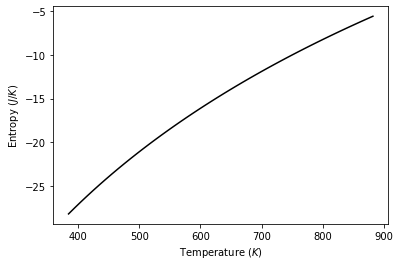

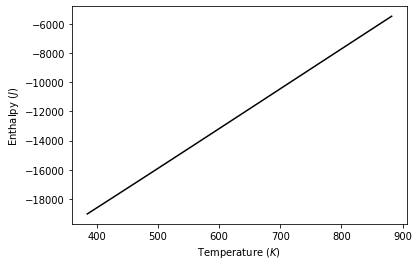

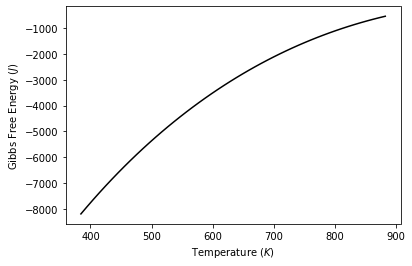

In [8]:
T = np.linspace(min(T_measured)+273.15, max(T_measured)+273.15)

#Calculated S, H and G for vit105 crystal
#Note that these are only up to a constant, since we didn't specify the enthalpy of formation
plt.plot(T, vit105.entropy(T), "k", label="fit")
plt.xlabel("Temperature ($K$)")
plt.ylabel("Entropy ($J/K$)")
plt.show()


plt.plot(T, vit105.enthalpy(T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Enthalpy ($J$)")
plt.show()

plt.plot(T, vit105.gibbs(T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Gibbs Free Energy ($J$)")
plt.show()

### Multi-Phase Materials

Admittedly, the thermo.Material class does not do much for a single phase material, but it becomes very useful for materials with multiple phases. Let's create a subclass for materials with a glass phase and a crystal phase. Cp_fit_func is now a dictionary of fit functions for each phase.

In [9]:
class Glass_And_Crystal(thermo.Material):
    Cp_fit_func = {"glass":None, "crystal":thermo.cp_crystal}

In [10]:
sample_file = "ss_vit105glass_062322-1.txt"
sapphire_file = "ss_sapphire_062322-2.txt"
empty_file = "ss_empty_062322-1.txt"

vit105_glass_data = hf.Heat_Flow_Data(sample_file, sapphire_file, empty_file)

Now the first argument is a dictionary of hf.Heat_Flow_Data objects (or dictionary of lists of hf.Heat_Flow_Data objects), with entries for each phase. Keyword arguments can now be dictionaries with entries for each phase, or a single value that will be applied to all phases.

In [11]:
dsc_data = {"glass":vit105_glass_data, "crystal":vit105_crystal_data}
Tf = {"glass":None, "crystal":1085}
T_max = 500

vit105 = Glass_And_Crystal(dsc_data, molar_mass=mu_vit105, Tf=Tf, T_max=T_max)

(For materials with many phases or many measurements, the function thermo.gen_material() allows you to initialize a thermo.Material object with dsc output filenames specified in a .txt file)

Now the thermo.Material object attributes corresponding to thermo.Phase attributes return a dictionary with entries corresponding to each phase.

In [12]:
print(vit105.Cp_fitvals)

{'glass': None, 'crystal': array([1.45991825e-03, 4.88613438e-06])}


Attributes of individual phases can then be accessed as follows:

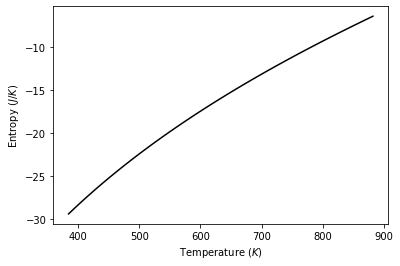

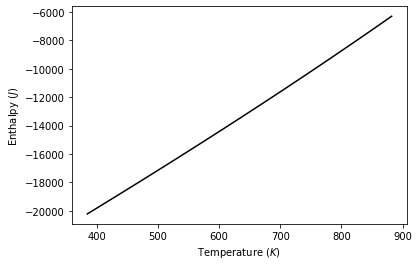

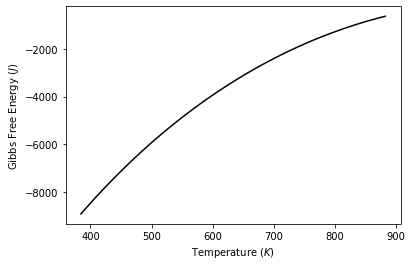

In [14]:
T = np.linspace(min(T_measured)+273.15, max(T_measured)+273.15)

#Calculated S, H and G for vit105 crystal
#Note that these are only up to a constant, since we didn't specify the enthalpy of formation
plt.plot(T, vit105.entropy["crystal"](T), "k", label="fit")
plt.xlabel("Temperature ($K$)")
plt.ylabel("Entropy ($J/K$)")
plt.show()


plt.plot(T, vit105.enthalpy["crystal"](T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Enthalpy ($J$)")
plt.show()

plt.plot(T, vit105.gibbs["crystal"](T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Gibbs Free Energy ($J$)")
plt.show()

Attributes of each phase can also be accessed just like the thermo.Material object is a dictionary of thermo.Phase objects:

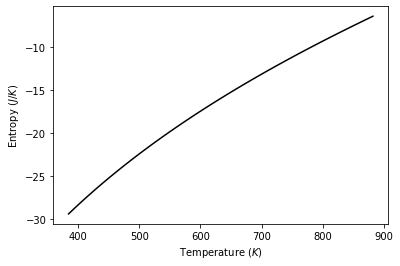

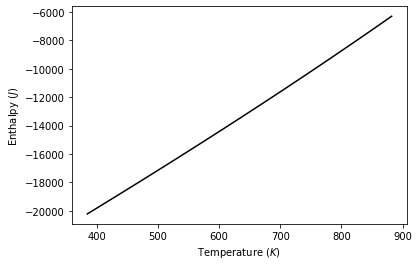

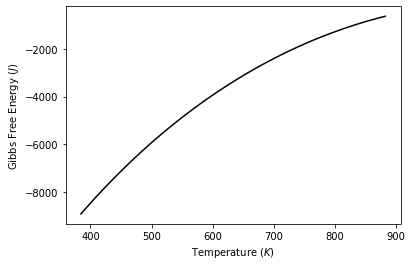

In [15]:
T = np.linspace(min(T_measured)+273.15, max(T_measured)+273.15)

#Calculated S, H and G for vit105 crystal
#Note that these are only up to a constant, since we didn't specify the enthalpy of formation
plt.plot(T, vit105["crystal"].entropy(T), "k", label="fit")
plt.xlabel("Temperature ($K$)")
plt.ylabel("Entropy ($J/K$)")
plt.show()


plt.plot(T, vit105["crystal"].enthalpy(T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Enthalpy ($J$)")
plt.show()

plt.plot(T, vit105["crystal"].gibbs(T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Gibbs Free Energy ($J$)")
plt.show()

Since single phase thermo.Material objects also behave like dictionaries of thermo.Phase objects, code can be written for thermo.Material objects without having to break into cases for single and multiple phases.